In [1]:
%load_ext autoreload
%autoreload 2


from util import *
from another_thing import algorithm



In [2]:

problem_file = 'STAGE1_3.json'
# problem_file = "TEST_K50_1.json"
timelimit = 30

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

Initial best obj = 4419.809
Merged bundle1 with shop_seq [8, 2] and bundle2 with shop_seq [27, 53] into new bundle with shop_seq [8, 2, 27, 53]
New best obj after merge = 4402.754
Merged bundle1 with shop_seq [37, 78] and bundle2 with shop_seq [17, 101] into new bundle with shop_seq [17, 37, 101, 78]
New best obj after merge = 4384.229
Merged bundle1 with shop_seq [65, 67] and bundle2 with shop_seq [70, 94] into new bundle with shop_seq [65, 70, 67, 94]
New best obj after merge = 4357.997
Merged bundle1 with shop_seq [22, 45] and bundle2 with shop_seq [12, 41] into new bundle with shop_seq [22, 12, 45, 41]
New best obj after merge = 4329.923
Merged bundle1 with shop_seq [50, 69] and bundle2 with shop_seq [86, 82] into new bundle with shop_seq [50, 86, 82, 69]
New best obj after merge = 4299.512
Merged bundle1 with shop_seq [55, 108] and bundle2 with shop_seq [20, 102] into new bundle with shop_seq [55, 20, 102, 108]
New best obj after merge = 4263.116999999999
New best obj after rider 

{'total_cost': 805288.4,
 'avg_cost': 4026.442,
 'num_drivers': 89,
 'total_dist': 345052,
 'feasible': True,
 'infeasibility': None,
 'bundles': [['BIKE', [1, 33], [1, 33]],
  ['BIKE', [14, 5], [14, 5]],
  ['BIKE', [4, 44], [4, 44]],
  ['BIKE', [19, 40], [19, 40]],
  ['WALK', [6, 7], [6, 7]],
  ['BIKE', [3, 13], [3, 13]],
  ['BIKE', [18, 11], [18, 11]],
  ['BIKE', [34, 30], [34, 30]],
  ['BIKE', [10, 39], [10, 39]],
  ['BIKE', [15, 16], [15, 16]],
  ['WALK', [38, 23], [38, 23]],
  ['WALK', [21, 59], [21, 59]],
  ['BIKE', [26, 51], [26, 51]],
  ['BIKE', [9, 110], [9, 110]],
  ['WALK', [35, 61], [35, 61]],
  ['BIKE', [24, 63], [24, 63]],
  ['BIKE', [36, 66], [36, 66]],
  ['BIKE', [46, 49], [46, 49]],
  ['BIKE', [29, 93], [29, 93]],
  ['BIKE', [0, 127], [0, 127]],
  ['BIKE', [52, 100], [52, 100]],
  ['BIKE', [25, 107], [25, 107]],
  ['BIKE', [56, 88], [56, 88]],
  ['BIKE', [60, 28], [60, 28]],
  ['BIKE', [85, 64], [85, 64]],
  ['BIKE', [47, 147], [47, 147]],
  ['BIKE', [48, 90], [48, 90]

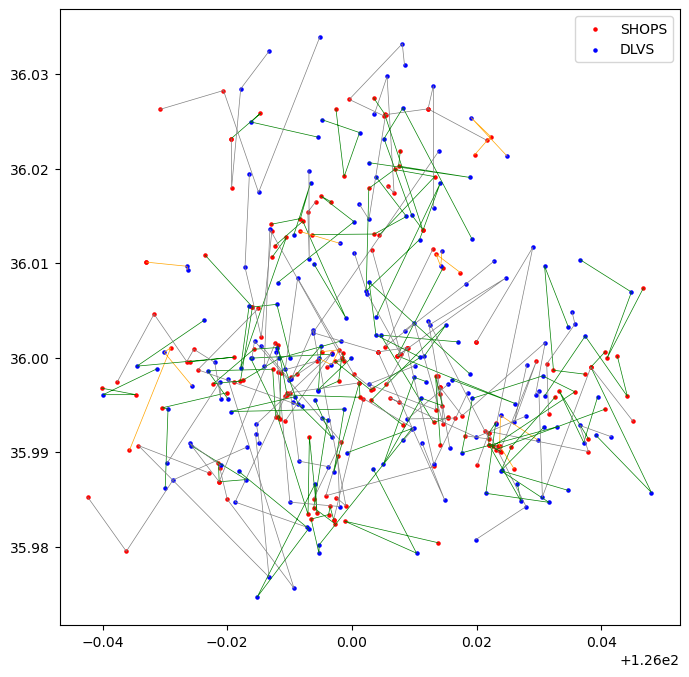

In [3]:
draw_route_solution(ALL_ORDERS, checked_solution)

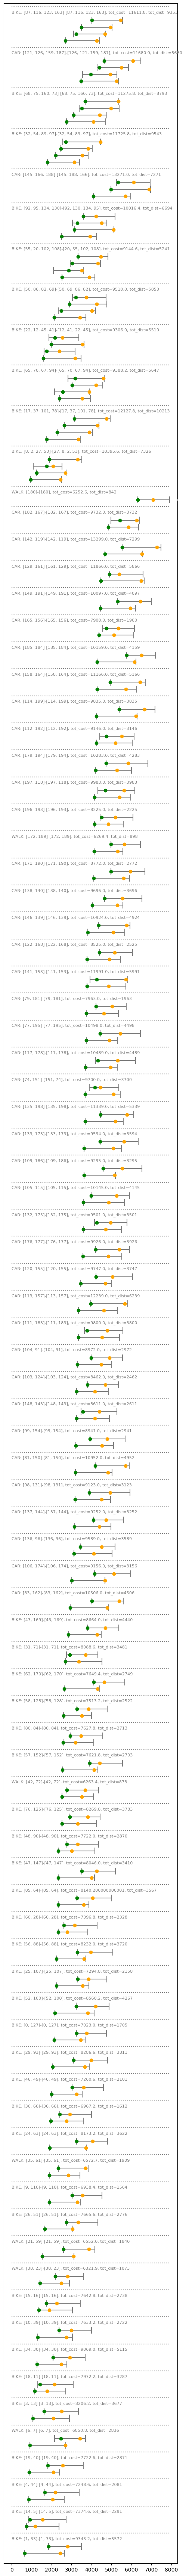

In [4]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)